In [1]:
!date

Wed Jun 22 12:43:20 EDT 2022


In [2]:
pwd

'/mmfs1/data/pijarj/BC-ORG-Data/Code/Tutorials'

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import ants

In [ ]:
# https://neurosynth.org/genes/

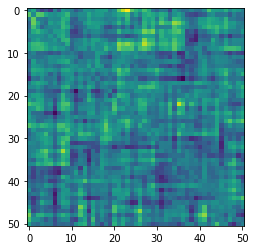

In [11]:
diffmats = np.load('../../Data/CVAE_diffmats_S661.npy')
plt.imshow(diffmats[0,:,:])

In [41]:
subject_diffmat = diffmats[0,:,:]

In [13]:
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
atlas

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (91, 109, 91)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

/data/pijarj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



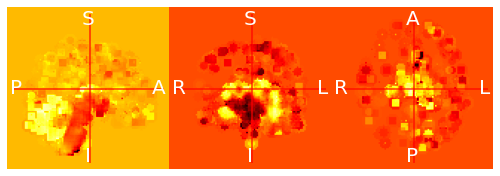

In [9]:
gene_im = ants.image_read('../../Data/Genemaps/gene_59528_SHANK3_85358.0.nii.gz')
gene_im.plot_ortho(flat=True,cmap='hot')

In [21]:
gene_flat = gene_im.numpy().flatten()
atlas_flat = atlas.numpy().flatten()

In [31]:
roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])

In [39]:
gene_sim = np.zeros((51,51))
for i in range(51):
    for j in range(51):
        gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

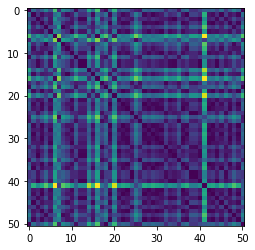

In [40]:
plt.imshow(gene_sim)

In [45]:
triu = np.triu_indices(51,k=1)

In [47]:
gene_vec = gene_sim[triu]
fmri_vec = subject_diffmat[triu]

In [50]:
np.corrcoef(gene_vec,fmri_vec)[0,1]

-0.007176476485660352